<img src="img/vs265header.svg"/>

<h1 align="center"> Lab 1 - Neuron Models <font color="red"> [SOLUTIONS] </font> </h1> 

In [349]:
#Ghassan Makhoul SID: 23900818
# PARTNERS: Doron Reuvan, Corten Singer, Tomas 
%matplotlib notebook
import pdb
import numpy as np
import matplotlib.pyplot as plt
from utils.lab1_utils import PlotterOne

## 1. Membrane model 

Simulate the RC circuit of the cell membrane to determine how the voltage across the membrane will change in response to a step input current, $I(t)$. Start off by deriving the solution for V(t) from the membrane equation. Then, numerically simulate this solution for a duration of 500 milliseconds with the following parameters:
- Initial Voltage Condition: $V(0) = V_{Leak} = -70 mV$
- Membrane Capacitance: $C_m = 100 pF$
- $ I(t) =
\begin{cases}
100 pA & \text{if  } 0 \leq t \leq 150\\
0 \text{ }pA & \text{otherwise}
\end{cases}
$
- Two different leak conductances: $G_{Leak} = $ (i) $5 nS$, and (ii) $10 nS$.

Plot the results of your simulation. Explain how the different values of $G_{Leak}$ affect the time constant and membrane voltage in your simulation and graph.

<IPython.core.display.Javascript object>


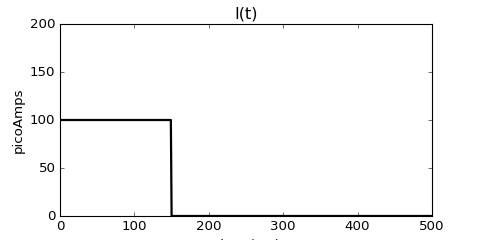

In [350]:
height = 100; stepLength = 150; totalLength = 500
I = np.array([height]*stepLength + [0]*(totalLength-stepLength+1))
plotterOne = PlotterOne(height, totalLength)
plotterOne.plotCurrent(I)

** V(t)**
From The circuit we have the following equation:
$$ (1)\hspace{2mm} Cm \frac{dV}{dt} + (V-V_r)G_{leak} = I_{in}(t), \hspace{5mm} (2) \hspace{2mm} \tau = \frac{C_{membrane}}{G_{leak}}$$
$$ \implies (3) \hspace{2mm}  \tau \frac{dV}{dt} + V = V_r + 1/G_{leak}I_{in}(t)$$
To solve this equation we will use the leaky integrator method, which essentially results in the convolution method, which is just the weighted sum of the input current with the response of system. The convolution operation is defined below: 
$$ (4) \hspace{2mm} x(\tau) = \int_{- \infty}^{t}f(\tau)h(\tau -t)dt$$
Here we can express f(t) as:
   $$f(t) = Vr + \frac{1}{G_{leak}} I_{in}(t) $$
h(t) is the solution to the  homogenous first order linear differential equation of (3):
So using separation of variables we get:
$$ h(t) = \int \frac{1}{V} dv= \int \frac{1}{\tau} dt \implies \ln(v)= \frac{t}{\tau} \implies V = V_0e^{t/\tau} $$

Plugging this into (4) yields the solution to V(t): 
Note: I removec the tau from the definition of convolution and substituted it with n to avoid confusion with our usage of the time constant from the RC-Circuit
$$V(n) =\int_{0}^{500}(V_r + \frac{1}{G_{leak}}I_{in}(n))(V_0e^{\frac{n-t}{\tau}})dt $$

In [347]:
def calcVoltage(CMembrane, GLeak, I,VLeak):
    """
    Calculates the voltage of the membrane over a timespan of 500 ms
    """
    GLeak = GLeak 
    Vr = VLeak
    V0 = Vr
    CMembrane = CMembrane
    
    #Calculating h and f
    Tau = CMembrane/GLeak
    T = np.arange(501)
    f= (Vr + I)/GLeak
    h = V0*np.e**((-T/Tau))
    V = np.convolve(h, -f) 
    print(Tau)
    return V 
    

<IPython.core.display.Javascript object>


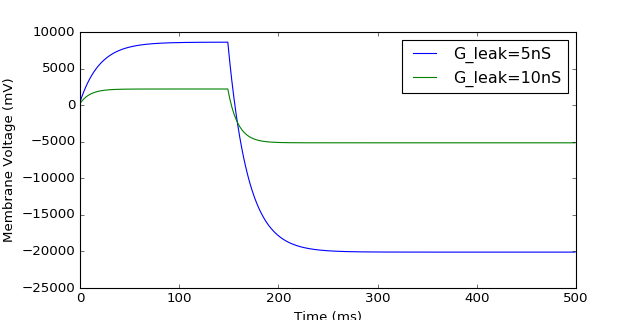

20.0
10.0


In [351]:
VLeak      = -70.0
CMembrane  = 100.0
plt.figure(figsize=(8,4))
for GLeak in (5.0,10.0):
    VMembrane = calcVoltage(CMembrane, GLeak, I,VLeak)
    plotterOne.plotMembraneVoltage(VMembrane, GLeak)

Aside from a scaling issue the behavior here seems to make sense. During the 150 seconds of input current we are seeing the voltage climb till the cell equilibrates under what I presume should be resting potential. After that the cell exponentially returns to what should be the resting potential. I think it is either my usage of the matlab convolve function that is screwing me up or my diffeq abilities.

## 2. Shunting Inhibition

Now let’s investigate the non-linear interactions that occur as a result of shunting inhibition. Consider a local compartment with sodium and chloride channels (in addition to $G_{Leak}= 5 nS$, and assume $V_{Leak}$ = -70 $mV$). First write down the membrane equation at equilibrium. Next, plot how the membrane voltage will change as you increase the sodium channel conductance alone, with the chloride channel closed. Then do the same for the chloride channel conductance, with the sodium channel closed. Finally, in a second plot, keep the chloride channel at a fixed conductance ($G_{Cl} = 10nS$) and increase the sodium channel conductance. What happens? How does this compare to what you expect from a linear superposition (plot this as a dashed line). Explain your results in terms of how $G_{Na}$ and $G_{Cl}$ affect the equilibrium membrane equation you wrote earlier.

$$ \tau = \frac{Cm}{Gtot}, G_{tot} = G_{leak} + G_{\Delta_{Na}}+ G_{\Delta_{Cl}} $$

$$\tau \frac{dV}{dt} + V = \frac{V_r G_l{eak} + V_{Na} G_{\Delta {Na}}+ V_{Cl} G_{\Delta_{Cl}}}{G_{tot}}$$
To solve this nonhomogenous first order diffeq, I will apply again the convolution method, defined as
$$x(\tau) = \int_{- \infty}^{t}f(\tau)h(\tau -t)d\tau$$
With h defined as the solution to the homogenous first order ODE and f defined as 
$$f(t) =\frac{V_r G_l{eak} + V_{Na} G_{\Delta {Na}}+ V_{Cl} G_{\Delta_{Cl}}}{G_{tot}}$$


In [352]:
from utils.lab1_utils import PlotterTwo

In [353]:
def computeVoltage(GNa, GCl, count):
    Gtot = GLeak + GNa + GCl
    dI = VLeak*GLeak + VCl*GCl + VNa*GNa 
    Tau = CMembrane/Gtot
    V0 = VLeak
    return ((1.0*dI)/Gtot)*(-1/Tau)*V0*np.e**((-count/Tau))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


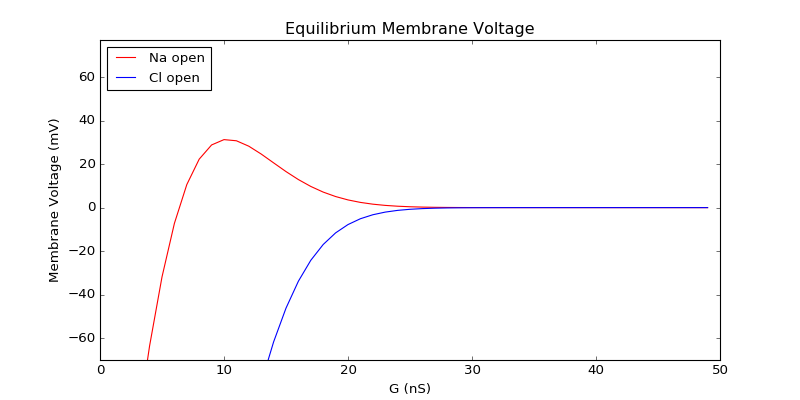

In [354]:
VLeak = -70.0
VNa = 55.0
VCl = -65.0
CMembrane = 100.0
GLeak = 5.0
GClFixed = 10.0

GMax = 50
plotterTwo = PlotterTwo(GMax, VLeak, VNa)

VMemNa = np.zeros(GMax) # Results for opening the Sodium channel
VMemCl = np.zeros(GMax) # Results for opening Chloride channel
VMemNaCl = np.zeros(GMax) # Results for opening Sodium at fixed GCl
VMemLinearNaCl = np.zeros(GMax) # Results for linear prediction
count = 0
for G in range(GMax):
    VMemNa[count] = computeVoltage(G, 0, count)
    VMemCl[count] = computeVoltage(0,G, count)
    VMemLinearNaCl[count] = VMemNa[count] + VMemCl[count]
    VMemNaCl[count] = computeVoltage(G, 10, count)
    count += 1.0
    

plotterTwo.plotEqMembraneVoltage(VMemNa, VMemCl)

<IPython.core.display.Javascript object>


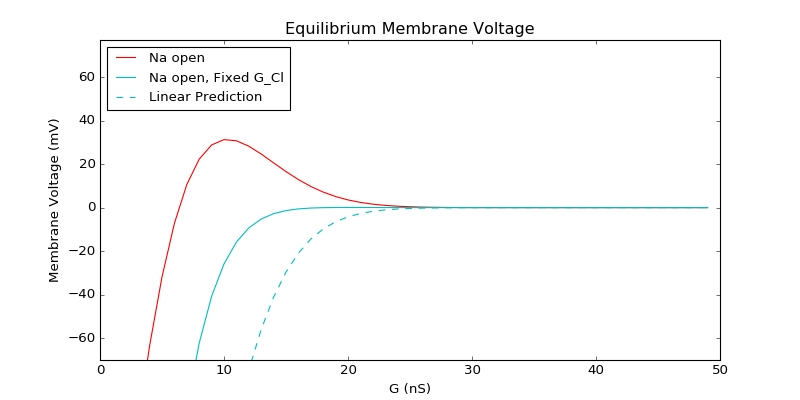

In [310]:
plotterTwo.plotEqMembraneVoltagePrediction(VMemNa, VMemNaCl, VMemLinearNaCl)

** Explanation**
The graph confirms the nonlinearity of physics in the cell membrane. We see that with a constant influx of Chloride it becomes harder for the sodium ions to depolarize the cell. Since the linear prediction and the Fixed plot don't intersect at G= 10ns we can deduce that the properties of linearity are not preserved in the membrance equation, which is the case. 

Physically speaking, we know that the accumulation of charge is exponentially related to the potential of the system. So the accumulation of a negative chloride charge is creating an exponential barrier that the sodium has to overcome in order to depolarize the cell. If the system were linear we would expect that for every one chloride ion, we simply need to supply 2 sodium ions to cancel out the effects of chloride, but this is not reflection in the graph, thus we have shunting inhibition.